# 最小二乘法

In [30]:
import numpy as np
import pylab as pl
import math

1.4349474726647082
2.0559131261889667


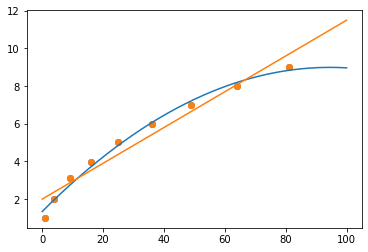

In [31]:
import numpy as np
import pylab as pl
import math


def phi_k(x, k):  # x^k
    y = x ** k
    return y


def squar_least(x, y, w, n):  #w是权重，n是阶数
    G = np.zeros((n + 1, n + 1))  #创建矩阵存放 n sum: xi xi^2
    d = np.zeros((n + 1))  #创建行数sum:yi xiyi
    for i in range(n + 1):
        for j in range(n + 1):
            G[i, j] = sum((w * phi_k(x, i)) * phi_k(x, j))  #算n  x的和 x^2的和

    for i in range(n + 1):
        d[i] = sum((w * phi_k(x, i)) * y)  #算y的和  xy的和

    a = np.dot(np.linalg.inv(G), d)  #解方程
    return a


x = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81])
y = np.array([1, 2, 3.1, 3.95, 5.01, 6, 6.97, 8, 9.02])
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])

a = squar_least(x, y, w, 2)  #2指的是2阶
yuce_y = a[0] * 1 + a[1] * 0.6 + a[2] * 0.6 * 0.6
print(yuce_y)

xxx = [];
yyy = []
for i in range(0, 1000):
    xxx.append(i / 10)
    yyy.append(a[0] * 1 + a[1] * i / 10 + a[2] * i / 10 * i / 10)
pl.scatter(x, y)
pl.plot(xxx, yyy)

a = squar_least(x, y, w, 1)  #1指的是1阶
yuce_y = a[0] * 1 + a[1] * 0.6
print(yuce_y)

xxx = [];
yyy = []
for i in range(0, 1000):
    xxx.append(i / 10)
    yyy.append(a[0] * 1 + a[1] * i / 10)
pl.scatter(x, y)
pl.plot(xxx, yyy)

# 拉格朗日

x=2.5 f(x)= 1.5296665994020477
x=40 f(x)= 6.199927388682746


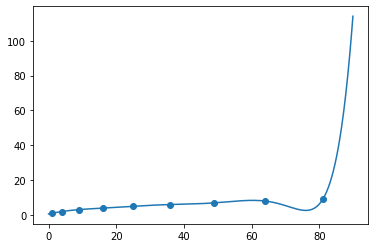

In [32]:
import numpy as np
import pylab as pl
import math


def lagelangri(x, y, ans_x):
    ans_y = 0
    for i_y in range(len(y)):
        temp = 1
        for i_x in range(len(x)):
            if i_x != i_y:
                temp *= (ans_x - x[i_x]) / (x[i_y] - x[i_x])
        ans_y += y[i_y] * temp
    return ans_y


x = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81])
y = np.array([1, 2, 3.1, 3.95, 5.01, 6, 6.97, 8, 9.02])
print("x=2.5 f(x)=", lagelangri(x, y, 2.5))  #x=2.5的时候  y=
print("x=40 f(x)=", lagelangri(x, y, 40))  #x=40的时候  y=
xxx = []
yyy = []
for i in range(0, 900):
    xxx.append(i / 10)
    yyy.append(lagelangri(x, y, i / 10))

pl.scatter(x, y)
pl.plot(xxx, yyy)

# 分段线性插值

x=2.5 f(x)= 1.5
x=40 f(x)= 6.298461538461538
x=2.5 sqrt= 1.5811388300841898
x=40 sqrt= 6.324555320336759


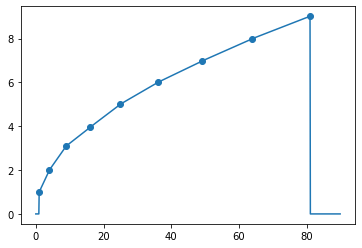

In [33]:
import numpy as np
import pylab as pl
import math


def fenduan(x, y, ans_x):  #  ans_x :f(ans_x)
    ans_y = 0
    for i in range(len(x) - 1):
        if x[i] <= ans_x <= x[i + 1]:
            ans_y = y[i] * ((ans_x - x[i + 1]) / (x[i] - x[i + 1])) + y[i + 1] * ((ans_x - x[i]) / (x[i + 1] - x[i]))

    return ans_y


x = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81])
y = np.array([1, 2, 3.1, 3.95, 5.01, 6, 6.97, 8, 9.02])

xxx = []
yyy = []
for i in range(0, 900):
    xxx.append(i / 10)
    yyy.append(fenduan(x, y, i / 10))

pl.scatter(x, y)
pl.plot(xxx, yyy)

#精度验证
print("x=2.5 f(x)=", fenduan(x, y, 2.5))  #x=2.5的时候  y=
print("x=40 f(x)=", fenduan(x, y, 40))  #x=40的时候  y=
print("x=2.5 sqrt=", math.sqrt(2.5))
print("x=40 sqrt=", math.sqrt(40))

# 复合梯形公式

In [34]:
#被积函数
def fun(x):
    return 1 / x


#复合梯形
def tx(a, b, n):
    h = (b - a) / n
    x = a
    s = fun(x) - fun(b)
    for k in range(1, n + 1):
        x = x + h
        s = s + 2 * fun(x)
        result = (h / 2) * s
        return result


a = 1
b = 5
n1 = 40
n2 = 20
t = tx(a, b, n1)  #起始值、结束值、分成几段
print("梯形公式", t)

梯形公式 0.13090909090909092


# 复合辛普森求积公式

In [35]:
def fun(x):
    return 1 / x


#复合辛普森
def xps(a, b, n):
    h = (b - a) / n
    x = a
    s = fun(x) - fun(b)
    for k in range(1, n + 1):
        x = x + h / 2
        s = s + 4 * fun(x)
        x = x + h / 2
        s = s + 2 * fun(x)
    result = (h / 6) * s
    return result


a = 1
b = 5
n2 = 20
p = xps(a, b, n2)  #起始值、结束值、分成几段
print("辛普森公式", p)

辛普森公式 1.6094411643415028


# 高斯求积公式

In [36]:
from math import exp
from math import sqrt
from math import log

f = lambda x: 1 / x


def G_quad(f, a, b, N):
    h = (b - a) / N;

    t = [-sqrt(3 / 5), 0, sqrt(3 / 5)]
    A = [5 / 9, 8 / 9, 5 / 9]
    x_fromt = [0, 0, 0]
    Sum_G = 0
    for k in range(N):
        for i in range(3):
            x_fromt[i] = h / 2 * t[i] + a + (k + 1 / 2) * h
        Sum_G = Sum_G + h / 2 * (A[0] * f(x_fromt[0]) + A[1] * f(x_fromt[1]) + A[2] * f(x_fromt[2]))
    return Sum_G


quadG = G_quad(f, 1, 5, 15)  #函数体、起始值、结束值、分成几段. 这里是1，5之间分成15段

print(quadG)
print(log(5) - quadG)  #截断误差


1.60943789295249
1.948161032494511e-08


# 高斯列主元

In [37]:
import numpy as np


def Gauss(A, b):
    n = len(b);
    index = 1;
    x = np.zeros(n)
    for k in range(n):
        #＇选主元＇
        a_max = 0
        for i in range(k, n):
            if abs(A[i][k]) > a_max:
                a_max = abs(A[i][k])
                r = i
            if a_max < 0.00000001:
                index = 0
                return
                #＇交换两行＇
            if r > k:
                for j in range(k, n):
                    z = A[k][j];
                    A[k][j] = A[r][j];
                    A[r][j] = z
                z = b[k];
                b[k] = b[r];
                b[r] = z;
                #＂消元计算＂
            for i in range(k + 1, n):
                m = A[i][k] / A[k][k]
                for j in range(k + 1, n):
                    A[i][j] = A[i][j] - m * A[k][j]
                b[i] = b[i] - m * b[k]
            #回代过程
            if abs(A[n - 1][n - 1]) < 0.0000001:
                index = 0
                return
            for k in range(n - 1, 0 - 1, -1):
                for j in range(k + 1, n): b[k] = b[k] - A[k][j] * x[j]
                x[k] = b[k] / A[k][k]
                return index, x


A = [[15, 2, 3, 2], [3, 15, 6, 5], [5, 6, 18, 3], [6, 5, 4, 13]]
b = [22, 28, 13, 15]
print("高斯列主元：{}".format(Gauss(A, b)))

高斯列主元：(1, array([0.        , 0.        , 0.        , 0.50819672]))


# 雅可比迭代

In [38]:
import numpy as np


#A:左边的3*3的矩阵 b:右边3*1的矩阵 x0:x的初值
# it_max:限制的最大迭代次数
#ep:设置精度
def Jacobi(A, b, x0, it_max, ep):
    D = np.diag(np.diag(A))
    U = -np.triu(A, 1)
    L = -np.tril(A, -1)
    B = np.dot(np.linalg.inv(D), (L + U))
    f = np.dot(np.linalg.inv(D), b)
    x = np.dot(B, x0) + f
    k = 1
    index = 1
    while np.linalg.norm(x - x0) >= ep:
        x = x0
        x = np.dot(B, x0) + f
        k = k + 1
        if k > it_max:
            index = 0
            break
        return k, index, x


A = [[4, 3, 0], [3, 4, -1], [0, -1, 4]]
b = [24, 30, -24]
x0 = [0, 0, 0]
print(Jacobi(A, b, x0, 100, 0.000001))

(2, 1, array([ 6. ,  7.5, -6. ]))


# 高斯赛德尔迭代

In [39]:
import numpy as np


#A:左边的3*3的矩阵 b:右边3*1的矩阵 x0:x的初值
# it_max:限制的最大迭代次数
#ep:设置精度
def G_S(A, b, x0, it_max, ep):
    D = np.diag(np.diag(A))
    U = -np.triu(A, 1)
    L = -np.tril(A, -1)
    B = np.dot(np.linalg.inv(D - L), U)
    f = np.dot(np.linalg.inv(D - L), b)
    x = np.dot(B, x0) + f
    k = 1
    index = 1
    while np.linalg.norm(x - x0) >= ep:
        x = x0
        x = np.dot(B, x0) + f
        k = k + 1
        if k > it_max:
            index = 0
            break
        return k, index, x


A = [[4, 3, 0], [3, 4, -1], [0, -1, 4]]
b = [24, 30, -24]
x0 = [0, 0, 0]
print(G_S(A, b, x0, 100, 0.000001))

(2, 1, array([ 6.  ,  3.  , -5.25]))


# 二分法

In [40]:
import math

#原函数
f = lambda x: x ** 2 - 3 * x + 2 - math.e ** x


#迭代法
#f:原函数 起始值 结束值 设置精度
def b(f, a, b, ep):
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        return 0
    k = 1
    while abs(b - a) / 2 > ep:
        x = (a + b) / 2
        fx = f(x)
        if fx == 0:
            return 1, k, x
        elif fx * fa < 0:
            fb = fx
            b = x
        else:
            fa = fx
            a = x
        k += 1

    x = (a + b) / 2
    return 1, k, x


ans_b = b(f, 0, 1, 10 ** -6)
print(ans_b)


(1, 20, 0.25753116607666016)


# 牛顿法

In [41]:
import math

#原函数
f = lambda x: x ** 2 - 3 * x + 2 - math.e ** x
#原函数的导数
fd = lambda x: 2 * x - 3 - math.e ** x


#f:原函数 导数 起始值 结束值 设置精度
def n(f, fd, x, ep, it_max):
    index = 0
    k = 1
    while k < it_max:
        x1 = x
        fv = f(x)
        fdv = fd(x)
        if abs(fdv) < ep:
            break
        x = x1 - fv / fdv
        if abs(x - x1) < ep:
            index = 1
            break
        k += 1
    return index, k, x


ans_n = n(f, fd, 1.5, 10 ** -6, 20)
print((ans_n))


(1, 4, 0.257530285439827)


# 欧拉法

In [46]:
import numpy as np
import math
import pylab as pl

h = 0.01
n = int(1 / h)
f = lambda x, y: -50 * y + 50 * x ** 2 + 2 * x

# f: 函数体
# x0 初值
# y0 初值
# h 间距
# n 不用你管
def E(f, x0, y0, h, N):
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    x[0] = x0
    y[0] = y0
    for i in range(N):
        x[i + 1] = x[i] + h
        y[i + 1] = y[i] + h * f(x[i], y[i])
    return x, y


[xx, yy] = E(f, 0, 1 / 3, h, n)
print(xx)
print(yy)

xxx = np.arange(0, 1 + h, h)
yyy = []
for i in xxx:
    yyy.append((math.e ** (-50 * i) / 3) + i ** 2)
    # yyy.append(xxx)
pl.plot(xx, yy, label="Euler", linestyle=":")

pl.plot(xxx, yyy, color="red", label="right", alpha=0.3)
pl.legend()
pl.show()


KeyboardInterrupt: 

# 改进欧拉法

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ] [0.33333333 0.20845833 0.13064896 0.0823306  0.05251912 0.03434945
 0.02353091 0.01738182 0.01422614 0.01301633 0.01309771 0.01406107
 0.01565067 0.01770667 0.02012917 0.02285573 0.02584733 0.02907958
 0.03253724 0.03621077 0.04009423 0.0441839  0.04847744 0.0529734
 0.05767087 0.0625693  0.06766831 0.07296769 0.07846731 0.08416707
 0.09006692 0.09616682 0.10246676 0.10896673 0.1156667  0.12256669
 0.12966668 0.13696668 0.14446667 0.15216667 0.16006667 0.16816667
 0.17646667 0.1849

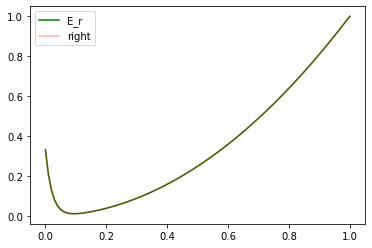

In [43]:
import numpy as np
import math
import pylab as pl

h = 0.01
n = int(1 / h)
f = lambda x, y: -50 * y + 50 * x ** 2 + 2 * x

#f:函数体
# x0初值
# y0初值
# h 间距
# n不用你管
def E_r(f, x0, y0, h, N):
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    x[0] = x0
    y[0] = y0
    for i in range(N):
        x[i + 1] = x[i] + h
        y_b = y[i] + h * f(x[i], y[i])
        y[i + 1] = y[i] + h / 2 * (f(x[i], y[i]) + f(x[i + 1], y_b))
    return x, y


[xx_r, yy_r] = E_r(f, 0, 1 / 3, h, n)
print(xx_r, yy_r)

xxx = np.arange(0, 1 + h, h)
yyy = []
for i in xxx:
    yyy.append((math.e ** (-50 * i) / 3) + i ** 2)
    # yyy.append(xxx)

pl.plot(xx_r, yy_r, label="E_r", color="green", linestyle="-")

pl.plot(xxx, yyy, color="red", label="right", alpha=0.3)
pl.legend()
pl.show()


# 龙格库塔法

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ] [0.33333333 0.2023572  0.12312403 0.07536562 0.04678383 0.02991649
 0.02023579 0.01499437 0.01252523 0.01181687 0.01225555 0.01346886
 0.01523085 0.01740439 0.01990631 0.02268612 0.02571319 0.02896894
 0.03244209 0.0361258  0.04001592 0.04410992 0.04840628 0.05290407
 0.05760273 0.06250192 0.06760142 0.07290112 0.07840094 0.08410083
 0.09000077 0.09610072 0.1024007  0.10890069 0.11560068 0.12250067
 0.12960067 0.13690067 0.14440066 0.15210066 0.16000066 0.16810066
 0.17640066 0.184

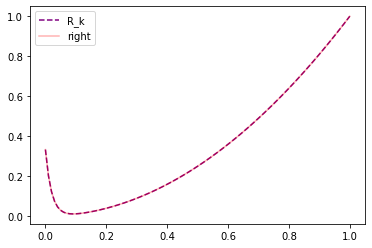

In [44]:
import numpy as np
import math
import pylab as pl

h = 0.01
n = int(1 / h)
f = lambda x, y: -50 * y + 50 * x ** 2 + 2 * x

# f: 函数体
# x0 初值
# y0 初值
# h 间距
# n 不用你管
def R_k(f, x0, y0, h, N):
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    x[0] = x0
    y[0] = y0
    for i in range(N):
        x[i + 1] = x[i] + h
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        k3 = f(x[i] + h / 2, y[i] + h / 2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + h / 6 * (k1 + k2 * 2 + k3 * 2 + k4)
    return x, y


[xx_R_k, yy_R_k] = R_k(f, 0, 1 / 3, h, n)
print(xx_R_k, yy_R_k)

xxx = np.arange(0, 1 + h, h)
yyy = []
for i in xxx:
    yyy.append((math.e ** (-50 * i) / 3) + i ** 2)
    # yyy.append(xxx)

pl.plot(xx_R_k, yy_R_k, label="R_k", linestyle="--", color="purple")
pl.plot(xxx, yyy, color="red", label="right", alpha=0.3)
pl.legend()
pl.show()


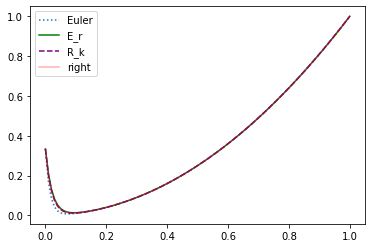

In [45]:
xxx = np.arange(0, 1 + h, h)
yyy = []
for i in xxx:
    yyy.append((math.e ** (-50 * i) / 3) + i ** 2)
    # yyy.append(xxx)
pl.plot(xx, yy, label="Euler", linestyle=":")
pl.plot(xx_r, yy_r, label="E_r", color="green", linestyle="-")
pl.plot(xx_R_k, yy_R_k, label="R_k", linestyle="--", color="purple")
pl.plot(xxx, yyy, color="red", label="right", alpha=0.3)
pl.legend()
pl.show()

# 一阶常微分